In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import ast
import math
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

import seaborn as sns
from scipy.stats.stats import pearsonr

%matplotlib inline

In [27]:
df = pd.read_csv('report.csv')
dataphone = pd.read_csv('smartphone.csv')
dowjones= pd.read_csv('dow_jones_index.csv')
glasses= pd.read_csv('glasses.csv')

In [28]:
df.head()

,index,activity_type,duration,from,to,comment
0,0,Video games,01:43,2017-07-01 21:34,2017-07-01 23:17,NaN
1,1,In computer,00:03,2017-07-01 21:29,2017-07-01 21:32,NaN
2,2,At home,13:35,2017-07-01 21:13,2017-07-02 10:49,NaN
3,3,In computer,00:05,2017-07-01 21:08,2017-07-01 21:13,NaN
4,4,Eat,00:18,2017-07-01 20:49,2017-07-01 21:07,NaN


In [29]:
df.activity_type.unique()

array(['Video games', 'In computer', 'At home', 'Eat', 'Sleep',
       'Watching TV', 'In vehicle', 'Picnic ', 'Walk', 'Running',
       'Phone was out of the pocket (forgot)', 'Train', 'Cooking',
       'In bus', 'Meeting', 'Pause', 'Movie', 'Football', 'Shop',
       'Shopping& wearing', 'Walking&party', 'On bus stop',
       'Took off glasses', 'Work'], dtype=object)

In [30]:
df = df.sort_values(['from', 'to'], ascending=[True, True])

#sort df by from 

In [31]:
for activity in df['activity_type'].unique():
    df[activity] = 0
    

In [32]:
del df['comment']

In [33]:
df

,index,activity_type,duration,from,to,Eat,In vehicle,Walk,Shop,Took off glasses,...,Sleep,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing
129,12,Eat,00:20,2017-06-29 09:57,2017-06-29 10:17,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,11,In vehicle,00:21,2017-06-29 10:46,2017-06-29 11:07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,10,Walk,01:52,2017-06-29 11:09,2017-06-29 13:01,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,9,Shop,00:28,2017-06-29 12:12,2017-06-29 12:40,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,8,Took off glasses,00:08,2017-06-29 12:21,2017-06-29 12:29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,7,On bus stop,00:18,2017-06-29 12:44,2017-06-29 13:02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,6,In bus,00:22,2017-06-29 13:02,2017-06-29 13:24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,5,At home,02:39,2017-06-29 13:28,2017-06-29 16:07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,4,Eat,00:08,2017-06-29 13:36,2017-06-29 13:44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,3,In bus,00:32,2017-06-29 16:12,2017-06-29 16:44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
index=0
for activity in df['activity_type'].unique():
    for index in range(len(df)):
        if df['activity_type'][index] == activity:
            df[activity][index] = 1
        index+=1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [35]:
df

,index,activity_type,duration,from,to,Eat,In vehicle,Walk,Shop,Took off glasses,...,Sleep,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing
129,12,Eat,00:20,2017-06-29 09:57,2017-06-29 10:17,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,11,In vehicle,00:21,2017-06-29 10:46,2017-06-29 11:07,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,10,Walk,01:52,2017-06-29 11:09,2017-06-29 13:01,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
126,9,Shop,00:28,2017-06-29 12:12,2017-06-29 12:40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
125,8,Took off glasses,00:08,2017-06-29 12:21,2017-06-29 12:29,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
124,7,On bus stop,00:18,2017-06-29 12:44,2017-06-29 13:02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
123,6,In bus,00:22,2017-06-29 13:02,2017-06-29 13:24,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
122,5,At home,02:39,2017-06-29 13:28,2017-06-29 16:07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,4,Eat,00:08,2017-06-29 13:36,2017-06-29 13:44,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,3,In bus,00:32,2017-06-29 16:12,2017-06-29 16:44,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df['from'] = df['from'].astype('datetime64[s]')
df['to'] = df['to'].astype('datetime64[s]')

In [37]:
df['houroftheday'] = df['from'].dt.hour

In [38]:
df

,index,activity_type,duration,from,to,Eat,In vehicle,Walk,Shop,Took off glasses,...,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing,houroftheday
129,12,Eat,00:20,2017-06-29 09:57:00,2017-06-29 10:17:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
128,11,In vehicle,00:21,2017-06-29 10:46:00,2017-06-29 11:07:00,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,10
127,10,Walk,01:52,2017-06-29 11:09:00,2017-06-29 13:01:00,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,11
126,9,Shop,00:28,2017-06-29 12:12:00,2017-06-29 12:40:00,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,12
125,8,Took off glasses,00:08,2017-06-29 12:21:00,2017-06-29 12:29:00,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,12
124,7,On bus stop,00:18,2017-06-29 12:44:00,2017-06-29 13:02:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
123,6,In bus,00:22,2017-06-29 13:02:00,2017-06-29 13:24:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
122,5,At home,02:39,2017-06-29 13:28:00,2017-06-29 16:07:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
121,4,Eat,00:08,2017-06-29 13:36:00,2017-06-29 13:44:00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
120,3,In bus,00:32,2017-06-29 16:12:00,2017-06-29 16:44:00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16


In [39]:
def plot_corr(dataset,size=10):
    corr=dataset.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.title('DowJones')

In [40]:
dfindexhour = df

In [41]:
dfindexhour = dfindexhour.reset_index(drop=True)

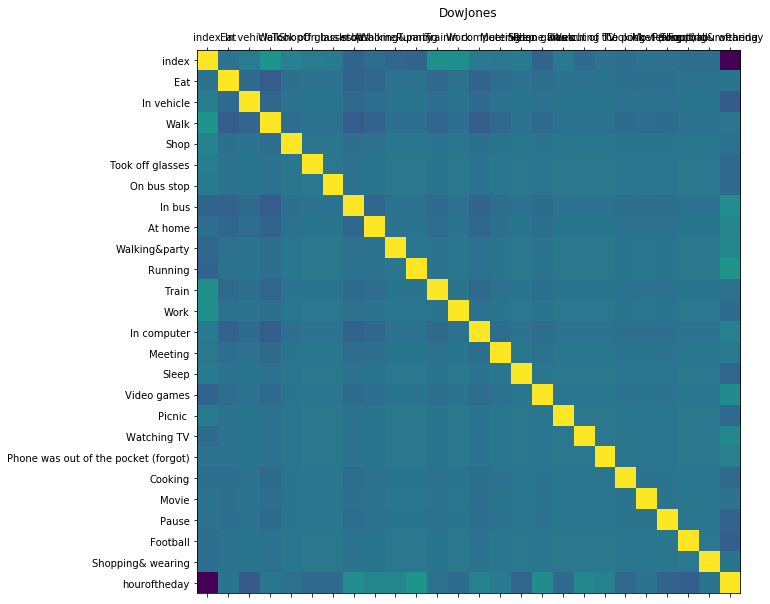

In [42]:
plot_corr(dfindexhour)

In [43]:
dfindexhour['index']=dfindexhour.index

In [44]:
dfindexhour=dfindexhour.set_index('index')

In [45]:
corr = df.corr()
df.corr().style.background_gradient()


,index,Eat,In vehicle,Walk,Shop,Took off glasses,On bus stop,In bus,At home,Walking&party,Running,Train,Work,In computer,Meeting,Sleep,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing,houroftheday
index,1,-0.0328959,0.0302329,0.198015,0.0729195,0.030903,0.0145298,-0.128691,-0.0625379,-0.118779,-0.130396,0.162597,0.160014,0.024482,-0.00417791,0.0145298,-0.133766,0.0145298,-0.0837092,-0.0345897,-0.061612,-0.0317644,-0.0368029,-0.067336,-0.067336,-0.668418
Eat,-0.0328959,1,-0.0870137,-0.179362,-0.0523769,-0.0300376,-0.0300376,-0.139573,-0.10312,-0.0426218,-0.0426218,-0.0926163,-0.0426218,-0.135338,-0.0680799,-0.0300376,-0.0748345,-0.0300376,-0.0300376,-0.0300376,-0.0606851,-0.0523769,-0.0606851,-0.0300376,-0.0300376,-0.0192301
In vehicle,0.0302329,-0.0870137,1,-0.115318,-0.0336749,-0.0193122,-0.0193122,-0.089736,-0.0662994,-0.027403,-0.027403,-0.0595462,-0.027403,-0.0870137,-0.0437709,-0.0193122,-0.0481137,-0.0193122,-0.0193122,-0.0193122,-0.0390165,-0.0336749,-0.0390165,-0.0193122,-0.0193122,-0.193066
Walk,0.198015,-0.179362,-0.115318,1,-0.0694143,-0.0398083,-0.0398083,-0.184973,-0.136663,-0.056486,-0.056486,-0.122743,-0.056486,-0.179362,-0.0902252,-0.0398083,-0.0991769,-0.0398083,-0.0398083,-0.0398083,-0.0804249,-0.0694143,-0.0804249,-0.0398083,-0.0398083,-0.0155035
Shop,0.0729195,-0.0523769,-0.0336749,-0.0694143,1,-0.0116248,-0.0116248,-0.0540156,-0.0399082,-0.016495,-0.016495,-0.0358432,-0.016495,-0.0523769,-0.0263474,-0.0116248,-0.0289615,-0.0116248,-0.0116248,-0.0116248,-0.0234856,-0.0202703,-0.0234856,-0.0116248,-0.0116248,-0.0472216
Took off glasses,0.030903,-0.0300376,-0.0193122,-0.0398083,-0.0116248,1,-0.00666667,-0.0309773,-0.0228869,-0.00945968,-0.00945968,-0.0205557,-0.00945968,-0.0300376,-0.0151099,-0.00666667,-0.0166091,-0.00666667,-0.00666667,-0.00666667,-0.0134687,-0.0116248,-0.0134687,-0.00666667,-0.00666667,-0.0955202
On bus stop,0.0145298,-0.0300376,-0.0193122,-0.0398083,-0.0116248,-0.00666667,1,-0.0309773,-0.0228869,-0.00945968,-0.00945968,-0.0205557,-0.00945968,-0.0300376,-0.0151099,-0.00666667,-0.0166091,-0.00666667,-0.00666667,-0.00666667,-0.0134687,-0.0116248,-0.0134687,-0.00666667,-0.00666667,-0.0955202
In bus,-0.128691,-0.139573,-0.089736,-0.184973,-0.0540156,-0.0309773,-0.0309773,1,-0.106346,-0.0439553,-0.0439553,-0.095514,-0.0439553,-0.139573,-0.0702099,-0.0309773,-0.0771759,-0.0309773,-0.0309773,-0.0309773,-0.0625837,-0.0540156,-0.0625837,-0.0309773,-0.0309773,0.152423
At home,-0.0625379,-0.10312,-0.0662994,-0.136663,-0.0399082,-0.0228869,-0.0228869,-0.106346,1,-0.0324754,-0.0324754,-0.0705683,-0.0324754,-0.10312,-0.0518729,-0.0228869,-0.0570196,-0.0228869,-0.0228869,-0.0228869,-0.0462385,-0.0399082,-0.0462385,-0.0228869,-0.0228869,0.0885851
Walking&party,-0.118779,-0.0426218,-0.027403,-0.056486,-0.016495,-0.00945968,-0.00945968,-0.0439553,-0.0324754,1,-0.0134228,-0.0291675,-0.0134228,-0.0426218,-0.0214403,-0.00945968,-0.0235675,-0.00945968,-0.00945968,-0.00945968,-0.0191114,-0.016495,-0.0191114,-0.00945968,-0.00945968,0.101172


In [46]:
cmap=sns.diverging_palette(0,10, as_cmap=True)

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_precision(10)\

,index,Eat,In vehicle,Walk,Shop,Took off glasses,On bus stop,In bus,At home,Walking&party,Running,Train,Work,In computer,Meeting,Sleep,Video games,Picnic,Watching TV,Phone was out of the pocket (forgot),Cooking,Movie,Pause,Football,Shopping& wearing,houroftheday
index,1,-0.0328959266,0.03023286397,0.1980146478,0.0729194612,0.03090301179,0.01452983712,-0.1286909783,-0.06253788414,-0.1187792944,-0.1303956632,0.1625970631,0.1600135572,0.02448195197,-0.004177909928,0.01452983712,-0.1337656495,0.01452983712,-0.08370921088,-0.03458968688,-0.06161201841,-0.03176439796,-0.03680291233,-0.06733603622,-0.06733603622,-0.6684180728
Eat,-0.0328959266,1,-0.08701365406,-0.1793616191,-0.05237694959,-0.03003757046,-0.03003757046,-0.1395726316,-0.103119965,-0.04262184994,-0.04262184994,-0.09261631867,-0.04262184994,-0.1353383459,-0.06807991523,-0.03003757046,-0.07483453357,-0.03003757046,-0.03003757046,-0.03003757046,-0.06068505646,-0.05237694959,-0.06068505646,-0.03003757046,-0.03003757046,-0.01923007779
In vehicle,0.03023286397,-0.08701365406,1,-0.115317723,-0.03367493332,-0.01931218198,-0.01931218198,-0.08973602124,-0.06629935441,-0.02740304592,-0.02740304592,-0.05954620076,-0.02740304592,-0.08701365406,-0.04377090731,-0.01931218198,-0.0481136826,-0.01931218198,-0.01931218198,-0.01931218198,-0.03901649954,-0.03367493332,-0.03901649954,-0.01931218198,-0.01931218198,-0.193066172
Walk,0.1980146478,-0.1793616191,-0.115317723,1,-0.06941428479,-0.03980828373,-0.03980828373,-0.1849732463,-0.1366631442,-0.05648601633,-0.05648601633,-0.1227428396,-0.05648601633,-0.1793616191,-0.09022515938,-0.03980828373,-0.09917694074,-0.03980828373,-0.03980828373,-0.03980828373,-0.08042487821,-0.06941428479,-0.08042487821,-0.03980828373,-0.03980828373,-0.01550349063
Shop,0.0729194612,-0.05237694959,-0.03367493332,-0.06941428479,1,-0.01162476387,-0.01162476387,-0.05401564975,-0.03990819581,-0.01649497392,-0.01649497392,-0.03584320633,-0.01649497392,-0.05237694959,-0.02634743513,-0.01162476387,-0.02896152282,-0.01162476387,-0.01162476387,-0.01162476387,-0.02348556962,-0.02027027027,-0.02348556962,-0.01162476387,-0.01162476387,-0.0472216427
Took off glasses,0.03090301179,-0.03003757046,-0.01931218198,-0.03980828373,-0.01162476387,1,-0.006666666667,-0.03097734591,-0.02288688541,-0.009459675397,-0.009459675397,-0.02055566129,-0.009459675397,-0.03003757046,-0.01510994713,-0.006666666667,-0.01660909597,-0.006666666667,-0.006666666667,-0.006666666667,-0.01346870059,-0.01162476387,-0.01346870059,-0.006666666667,-0.006666666667,-0.09552023127
On bus stop,0.01452983712,-0.03003757046,-0.01931218198,-0.03980828373,-0.01162476387,-0.006666666667,1,-0.03097734591,-0.02288688541,-0.009459675397,-0.009459675397,-0.02055566129,-0.009459675397,-0.03003757046,-0.01510994713,-0.006666666667,-0.01660909597,-0.006666666667,-0.006666666667,-0.006666666667,-0.01346870059,-0.01162476387,-0.01346870059,-0.006666666667,-0.006666666667,-0.09552023127
In bus,-0.1286909783,-0.1395726316,-0.08973602124,-0.1849732463,-0.05401564975,-0.03097734591,-0.03097734591,1,-0.1063462449,-0.04395534554,-0.04395534554,-0.09551397455,-0.04395534554,-0.1395726316,-0.07020990884,-0.03097734591,-0.07717585667,-0.03097734591,-0.03097734591,-0.03097734591,-0.06258368959,-0.05401564975,-0.06258368959,-0.03097734591,-0.03097734591,0.1524234625
At home,-0.06253788414,-0.103119965,-0.06629935441,-0.1366631442,-0.03990819581,-0.02288688541,-0.02288688541,-0.1063462449,1,-0.03247537602,-0.03247537602,-0.07056825969,-0.03247537602,-0.103119965,-0.05187294428,-0.02288688541,-0.05701957144,-0.02288688541,-0.02288688541,-0.02288688541,-0.04623849107,-0.03990819581,-0.04623849107,-0.02288688541,-0.02288688541,0.08858512248
Walking&party,-0.1187792944,-0.04262184994,-0.02740304592,-0.05648601633,-0.01649497392,-0.009459675397,-0.009459675397,-0.04395534554,-0.03247537602,1,-0.01342281879,-0.02916748251,-0.01342281879,-0.04262184994,-0.02144027927,-0.009459675397,-0.02356749848,-0.009459675397,-0.009459675397,-0.009459675397,-0